<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

<ipython-input-2-980086ee4333>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-2-980086ee4333>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


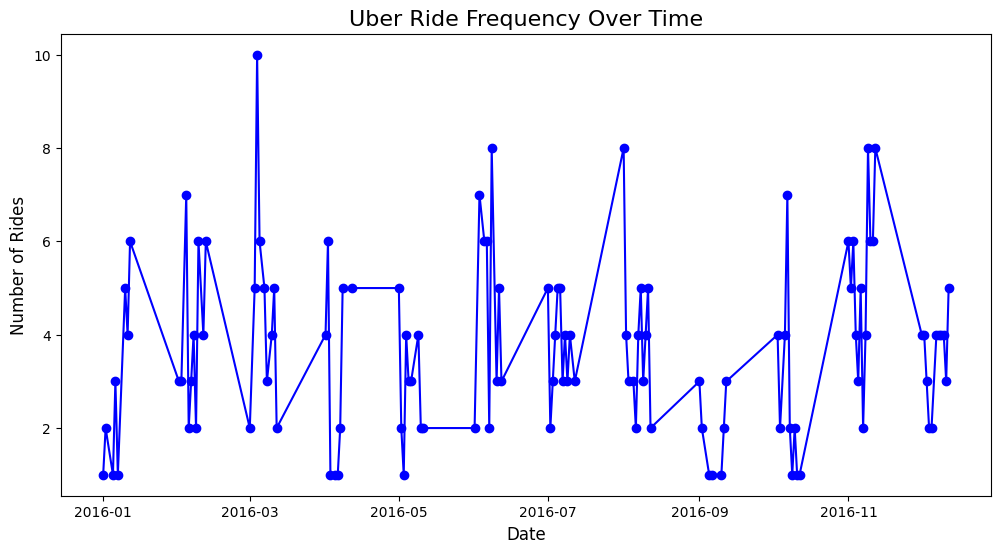

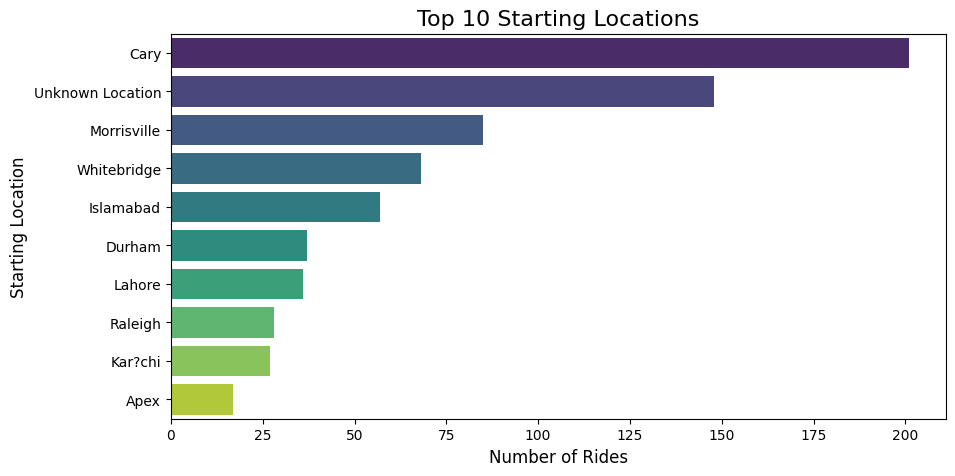

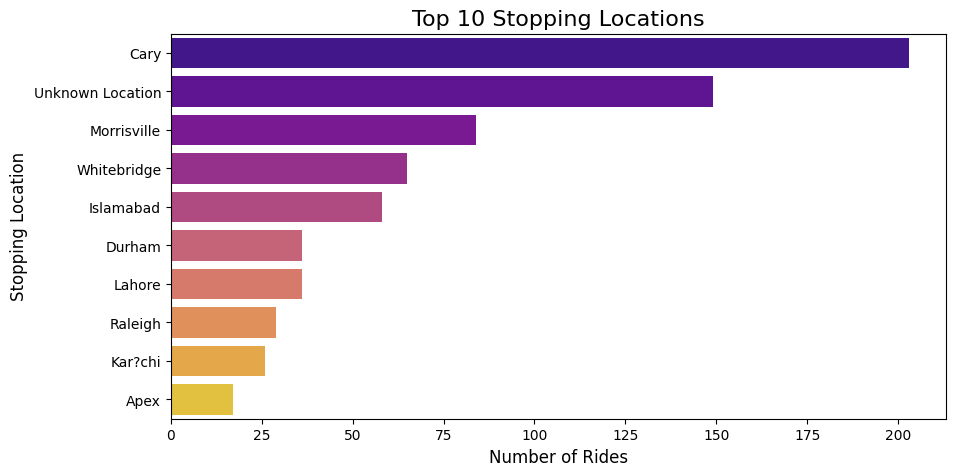

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


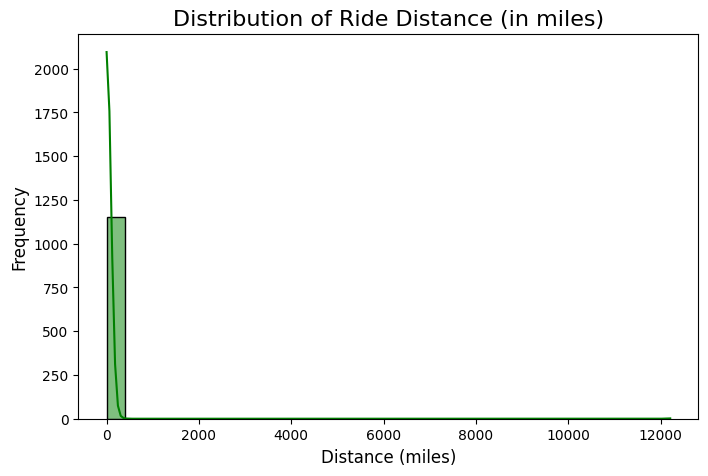

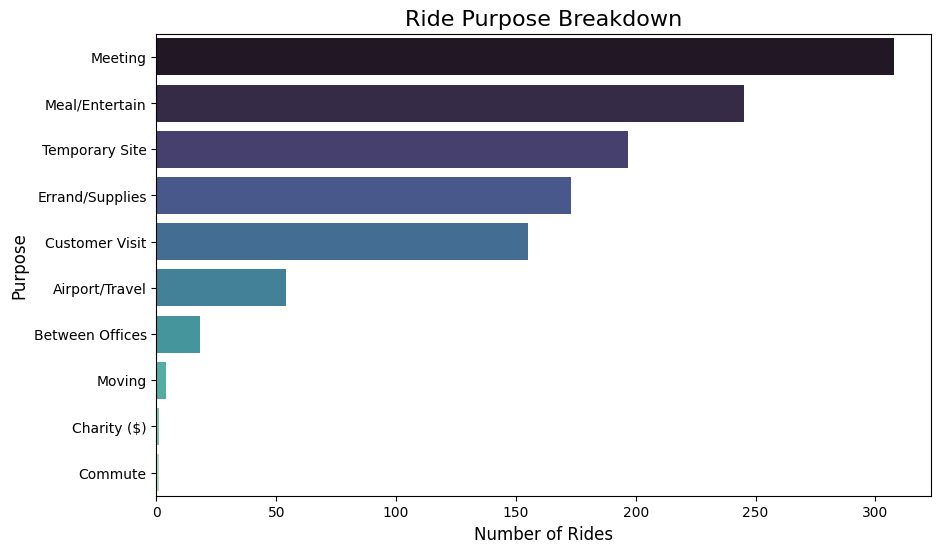

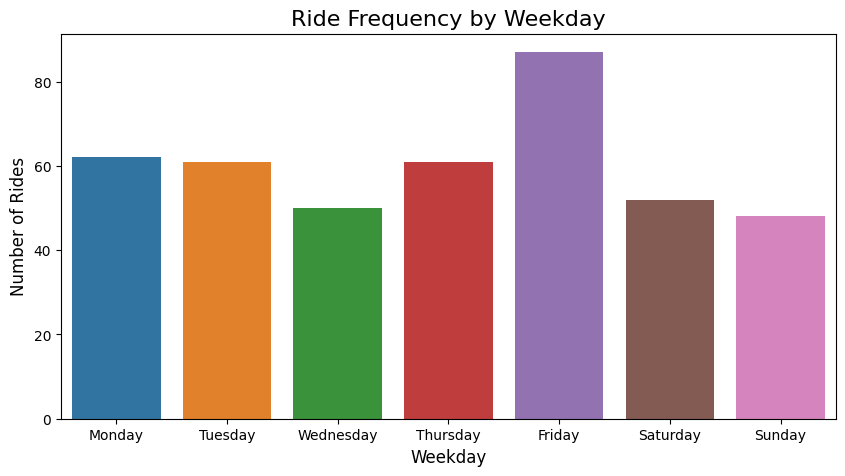

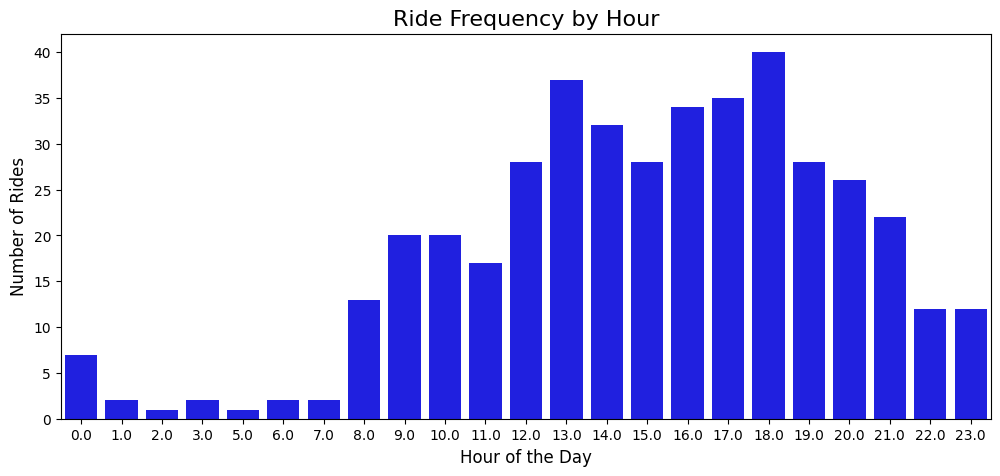

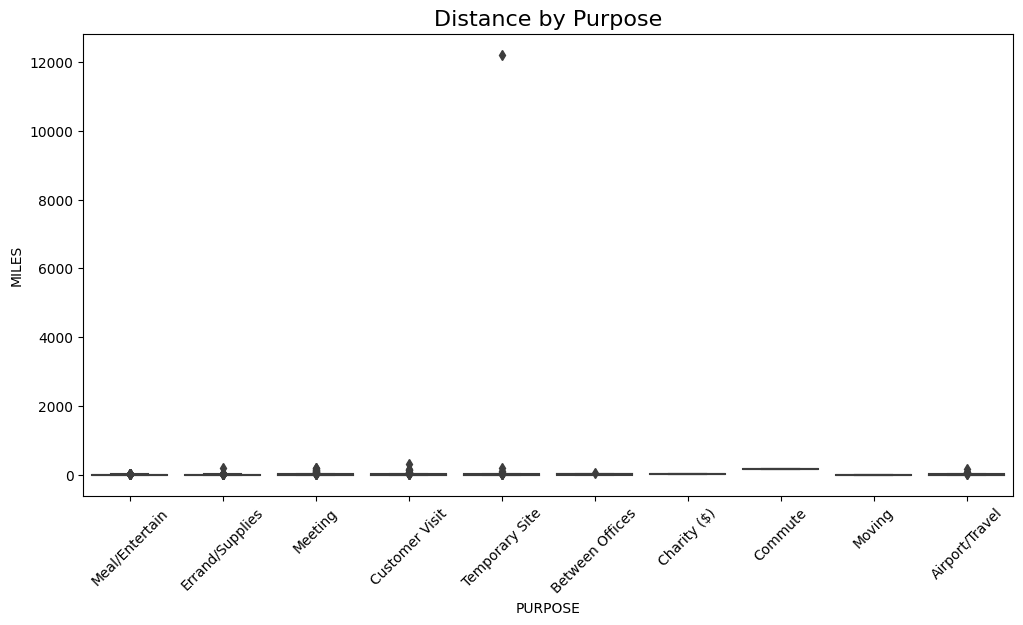

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


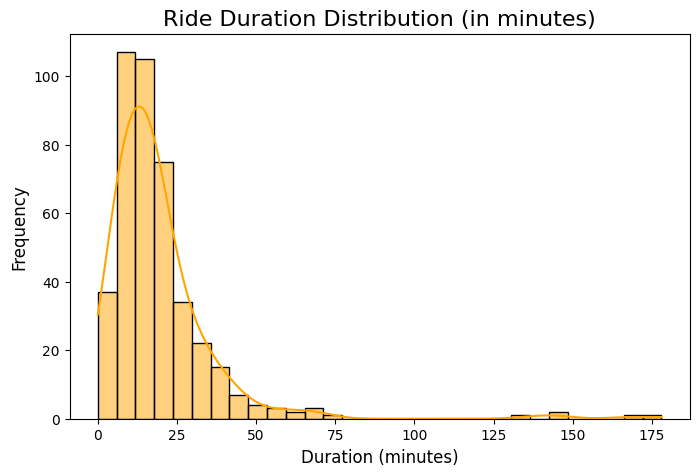

In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/uber-dataset/UberDataset.csv")


print(df.info)
print(df.describe)
#filling missing value
print(df.mean)
print(df.median)
#REMOVE NULL VALUE
df.isnull().sum()
print(df)
print(df.fillna('N'))
#by forward fill
df.fillna(method='ffill', inplace=True)
print(df)
#backward fill
df.fillna(method='bfill',inplace=True)
print(df)
#duplicate value
df.duplicated()
print(df)
df_cleaned = df.drop_duplicates(keep='first')
print(df_cleaned)
df_cleaned1 = df.drop_duplicates(keep='last')
print(df_cleaned1)
#convert the dat into datetime

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

## ✅ Ride Frequency Over Time
plt.figure(figsize=(12, 6))
df['START_DATE'].dt.date.value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title('Uber Ride Frequency Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.show()
# ✅ Top 10 Starting Locations
plt.figure(figsize=(10, 5))
sns.countplot(y=df['START'], order=df['START'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Starting Locations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Starting Location', fontsize=12)
plt.show()

# ✅ Top 10 Stopping Locations
plt.figure(figsize=(10, 5))
sns.countplot(y=df['STOP'], order=df['STOP'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Stopping Locations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Stopping Location', fontsize=12)
plt.show()
# ✅ Ride Distance Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['MILES'], bins=30, kde=True, color='green')
plt.title('Distribution of Ride Distance (in miles)', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# ✅ Ride Purpose Breakdown
plt.figure(figsize=(10, 6))
sns.countplot(y=df['PURPOSE'], order=df['PURPOSE'].value_counts().index, palette='mako')
plt.title('Ride Purpose Breakdown', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Purpose', fontsize=12)
plt.show()

# ✅ Analyze Trends by Weekday and Hour
df['weekday'] = df['START_DATE'].dt.day_name()
df['hour'] = df['START_DATE'].dt.hour

# Ride frequency by weekday
plt.figure(figsize=(10, 5))
sns.countplot(x='weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Frequency by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.show()

# Ride frequency by hour
plt.figure(figsize=(12, 5))
sns.countplot(x='hour', data=df, color='blue')
plt.title('Ride Frequency by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.show()

# ✅ Correlation Between Ride Distance and Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='PURPOSE', y='MILES', data=df)
plt.title('Distance by Purpose', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# ✅ Time Taken Between Start and Stop
df['duration_minutes'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
plt.figure(figsize=(8, 5))
sns.histplot(df['duration_minutes'], bins=30, kde=True, color='orange')
plt.title('Ride Duration Distribution (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()